In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [8]:
data = pd.read_csv("D://Fun Coding//Machine Learning//Projects//Amazon Customer Clustering//amazon_clustering.csv")
data.head()

,Cus_ID,Sex,Age,Income,Rating
0,301219.0,M,23.0,306555.0,44.0
1,301220.0,F,26.0,306555.0,91.0
2,301221.0,F,24.0,326992.0,7.0
3,301222.0,M,28.0,326992.0,87.0
4,301223.0,F,38.0,347429.0,45.0


In [12]:
data.isnull()

,Cus_ID,Sex,Age,Income,Rating
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
994,True,True,True,True,True
995,True,True,True,True,True
996,True,True,True,True,True
997,True,True,True,True,True


In [14]:
#deleting rows that contain null values
data.dropna(inplace = True)

In [16]:
data.isnull()

,Cus_ID,Sex,Age,Income,Rating
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [22]:
#applying min max scaler to the features like annual Income and Rating
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Income', 'Rating']] = scaler.fit_transform(data[['Income','Rating']])
data

,Cus_ID,Sex,Age,Income,Rating
0,301219.0,M,23.0,0.000000,0.385321
1,301220.0,F,26.0,0.000000,0.816514
2,301221.0,F,24.0,0.008197,0.045872
3,301222.0,M,28.0,0.008197,0.779817
4,301223.0,F,38.0,0.016393,0.394495
...,...,...,...,...,...
195,301414.0,F,42.0,0.860656,0.798165
196,301415.0,F,54.0,0.909836,0.275229
197,301416.0,M,39.0,0.909836,0.743119
198,301417.0,M,39.0,1.000000,0.174312


In [24]:
#Extracing the values from annual Income and Ratings
X = data.iloc[:, 3:5].values
X

array([[0.        , 0.3853211 ],
       [0.        , 0.81651376],
       [0.00819672, 0.04587156],
       [0.00819672, 0.77981651],
       [0.01639344, 0.39449541],
       [0.01639344, 0.7706422 ],
       [0.02459016, 0.04587156],
       [0.02459016, 0.95412844],
       [0.03278689, 0.01834862],
       [0.03278689, 0.72477064],
       [0.03278689, 0.12844037],
       [0.03278689, 1.        ],
       [0.04098361, 0.13761468],
       [0.04098361, 0.77981651],
       [0.04098361, 0.11926606],
       [0.04098361, 0.79816514],
       [0.04918033, 0.34862385],
       [0.04918033, 0.66055046],
       [0.06557377, 0.28440367],
       [0.06557377, 0.99082569],
       [0.07377049, 0.34862385],
       [0.07377049, 0.73394495],
       [0.08196721, 0.03669725],
       [0.08196721, 0.73394495],
       [0.10655738, 0.12844037],
       [0.10655738, 0.82568807],
       [0.10655738, 0.31192661],
       [0.10655738, 0.6146789 ],
       [0.1147541 , 0.30275229],
       [0.1147541 , 0.88073394],
       [0.

Text(0, 0.5, 'WCSS')

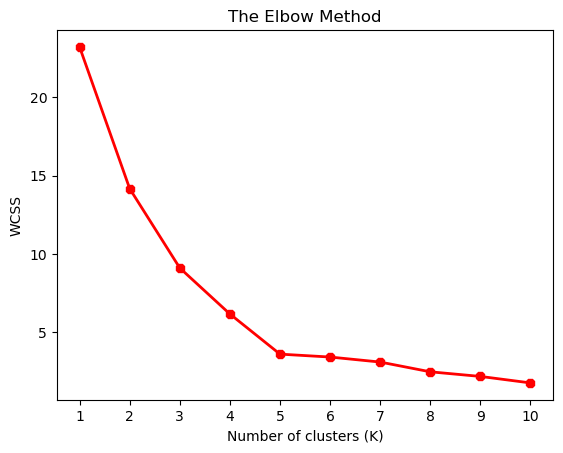

In [32]:
#Applying 'Elbow Method' to find optimal value of k
from sklearn.cluster import KMeans
#within cluster sum of square
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xticks(np.arange(1,11,1))
plt.title("The Elbow Method")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")

In [34]:
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

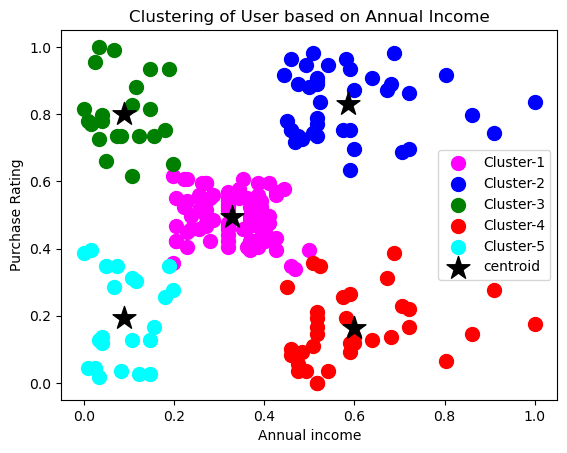

In [44]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='magenta', label='Cluster-1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label='Cluster-2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label='Cluster-3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='red', label='Cluster-4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='cyan', label='Cluster-5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=300, c='black', label="centroid", marker="*")
plt.title("Clustering of User based on Annual Income")
plt.xlabel("Annual income")
plt.ylabel("Purchase Rating")
plt.legend()
plt.show()